# Bike Sharing Data Science Task

# Setup 

In [1]:
#importing all the required libraries to be used in this task.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import missingno as ms
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

Descriptive Analysis

In [2]:
data_path = 'hour.csv' #loading the data 
hours_data = pd.read_csv(data_path)
hours_data.head(5) # visualize the top 5 records including the columns header by calling head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# The column header is being renamed so that it can be easily readable and understood. Dropping instant and year column
# data as it is not going to provide useful information.
hours_data.rename(columns= {'weathersit':'weather','mnth':'month','hr':'hour','hum':'humidity','cnt':'count'},inplace=True)
hours_data = hours_data.drop(['dteday','instant','yr'], axis = 1) 

In [4]:
#Get the data statistics for each column 
hours_data.describe()

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# Converting the columns type to category
hours_data['datetime'] = hours_data.season.astype('category')
hours_data['season'] = hours_data.season.astype('category')
hours_data['month'] = hours_data.month.astype('category')
hours_data['hour'] = hours_data.hour.astype('category')
hours_data['holiday'] = hours_data.holiday.astype('category')
hours_data['weekday'] = hours_data.weekday.astype('category')
hours_data['workingday'] = hours_data.workingday.astype('category')
hours_data['weather'] = hours_data.weather.astype('category')

hours_data.dtypes

season        category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
datetime      category
dtype: object

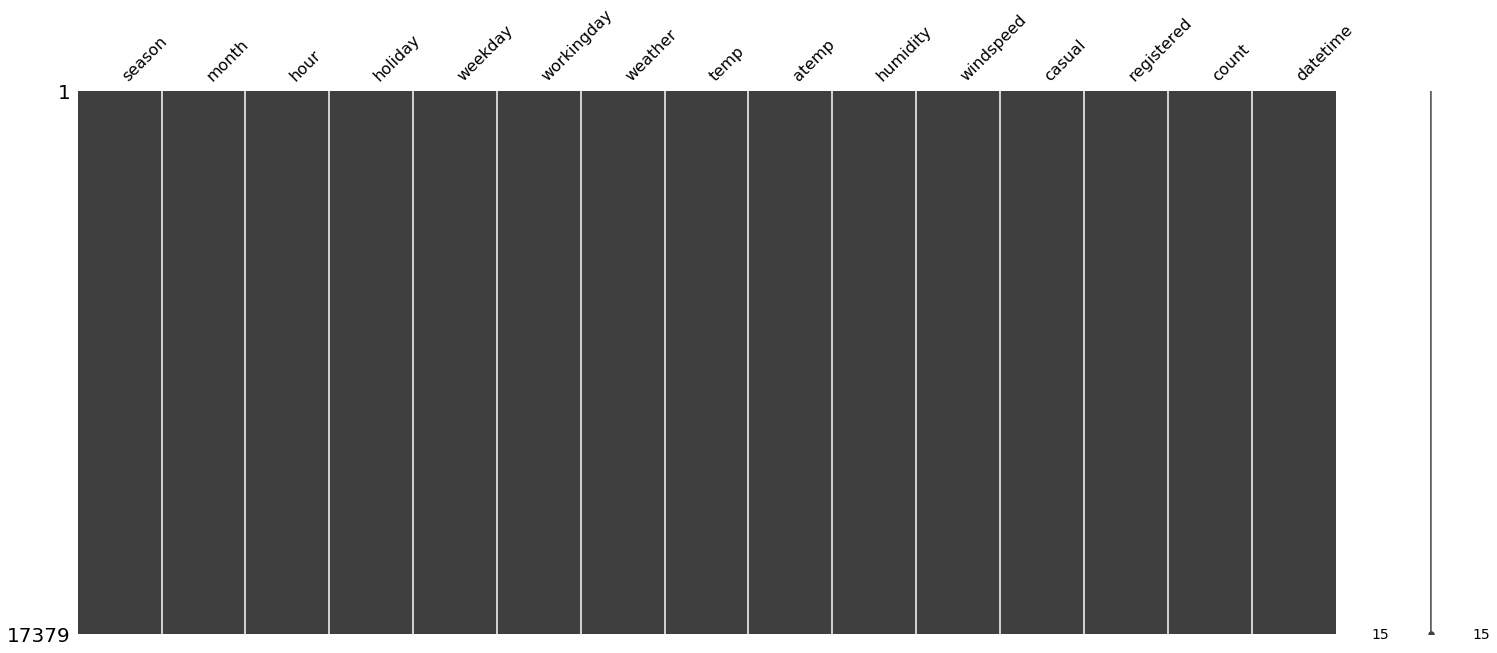

In [6]:
# Checking for any NULL value in the data
ms.matrix(hours_data)

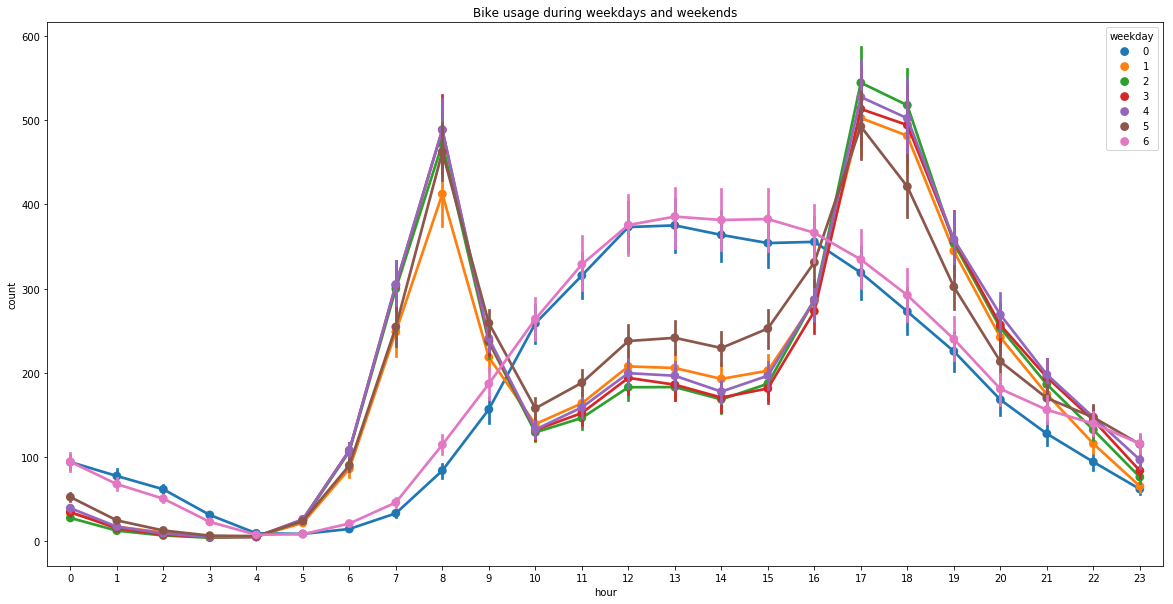

In [7]:
# Visualizing the usage of bike during weekday and weekends and the graph shows that the bikes are rented more
# during weekdays than weekends. The bike are used mostly during office hours 
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hours_data[['hour','count','weekday']],
            x='hour', y='count',
            hue='weekday', ax=ax, aspect=.5)
ax.set(title="Bike usage during weekdays and weekends")

[Text(0.5,1,'Bike usage during different weather condition')]

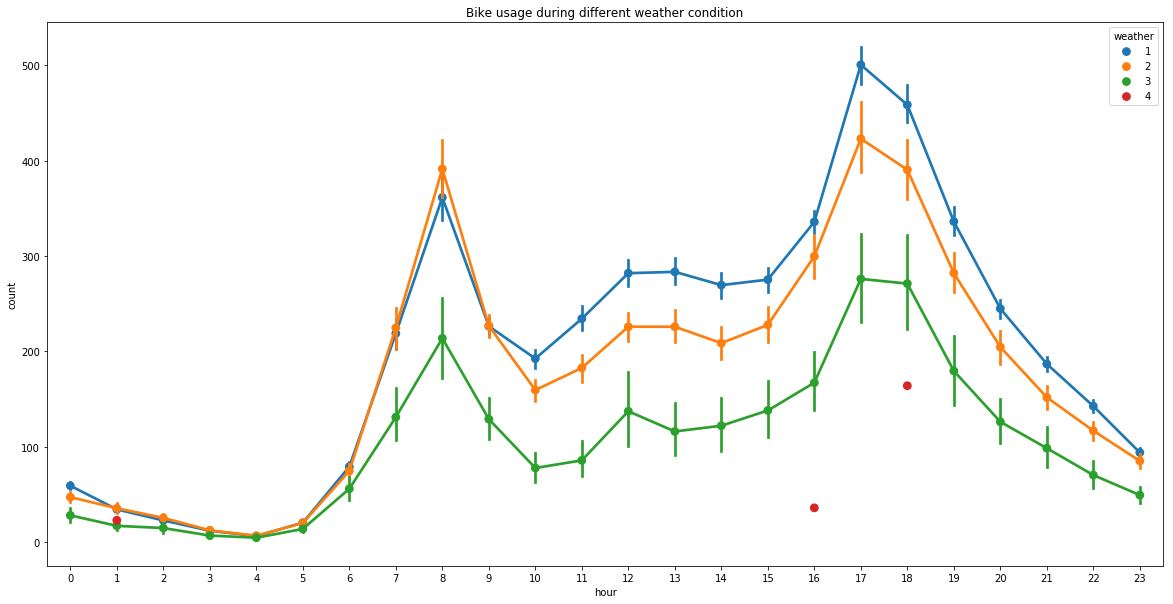

In [9]:
# Visualizing the usage of bike during different weather conditions and the graph shows that the bikes are rented
# more during weekdays than weekends. The use of bike declines once the weather condition becomes bad and there is
# almost negligible data during heavy snow and thunderstrom. 
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hours_data[['hour','count','weather']],
            x='hour', y='count',
            hue='weather', ax=ax, aspect=.8)
ax.set(title="Bike usage during different weather condition")

[Text(0.5,1,'Bike usage during different season')]

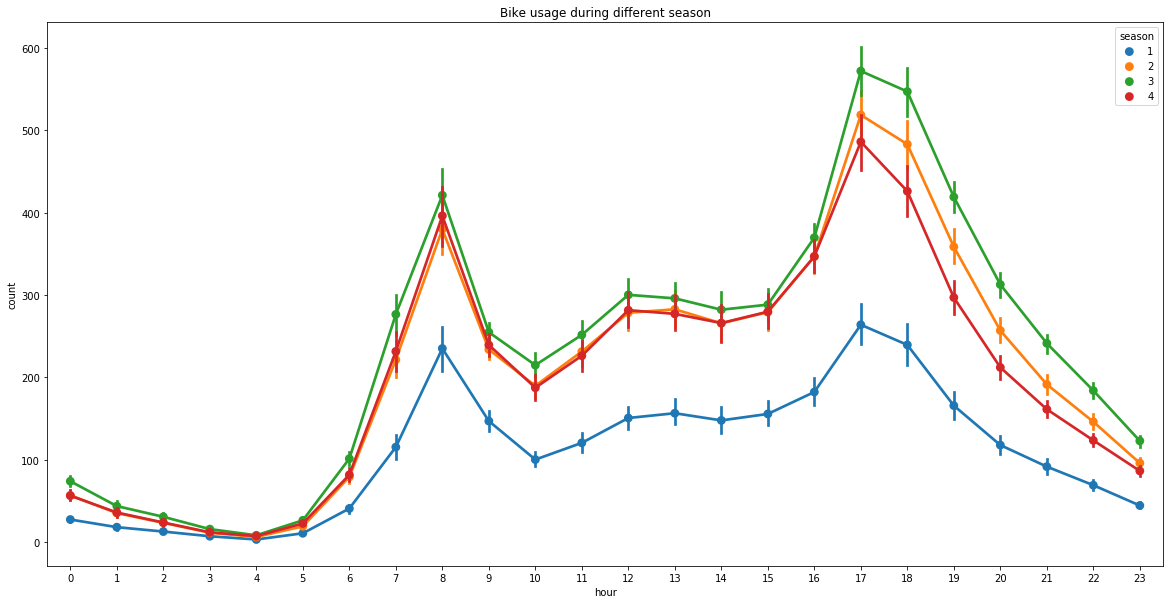

In [10]:
# Visualizing the usage of bike during different season and the graph shows that the bikes are rented more
# during fall and almost equal dring winter and summer. 
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=hours_data[['hour','count','season']],
            x='hour', y='count',
            hue='season', ax=ax, aspect=.8)
ax.set(title="Bike usage during different season")

[Text(0.5,1,'Monthly distribution')]

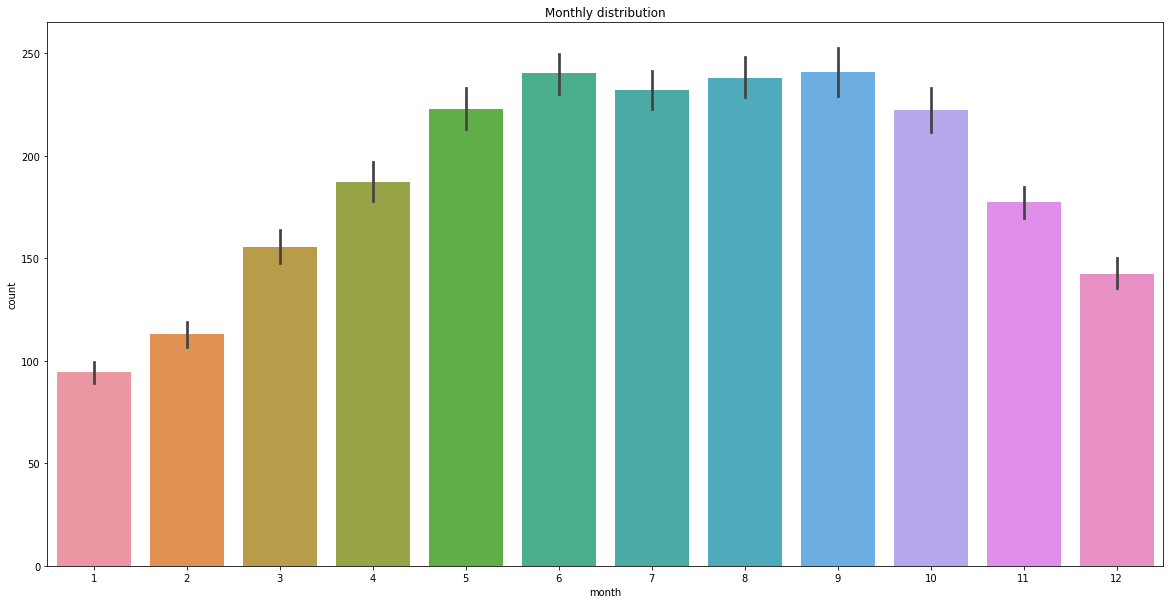

In [11]:
# The graph represents monthly distribution of data and we can see from May to October the usage of bike is at high
# compared to rest of the months
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=hours_data[['month','count']],
            x='month', y='count')
ax.set(title="Monthly distribution")

[Text(0.5,1,'Weekly distribution')]

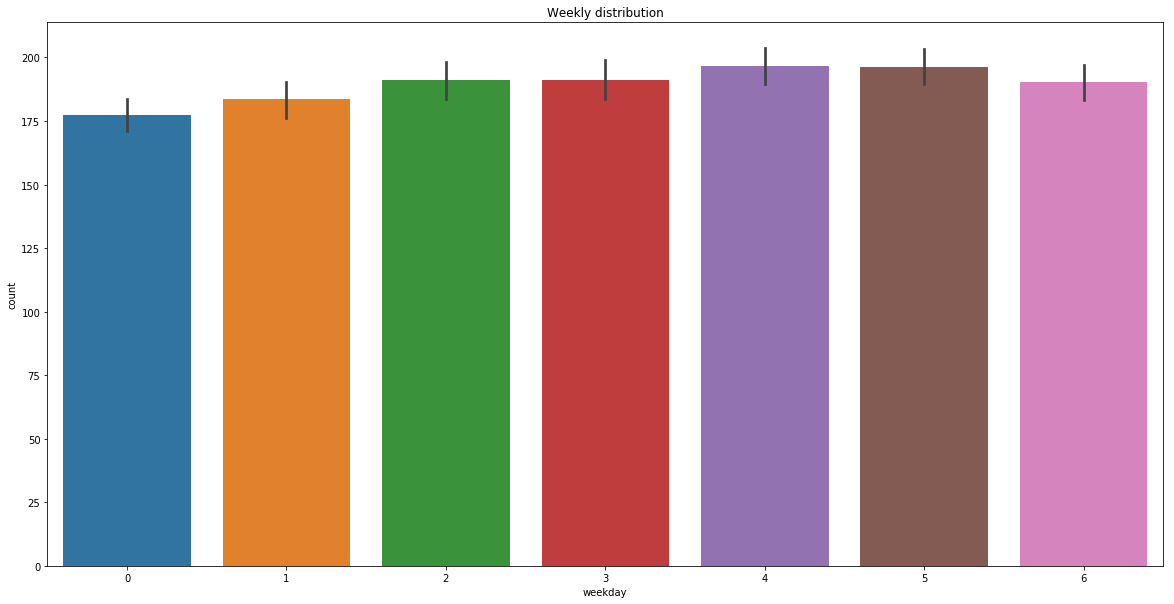

In [12]:
# The below graph represents the weekly usage of bike and we can see less variation in the data. Hence the weekly 
# distribution is not going to be much informative
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=hours_data[['weekday','count']],
            x='weekday', y='count')
ax.set(title="Weekly distribution")

In [7]:
# Splitting the raw data into X- data and y- target and visualizing its shape
y= hours_data['count']
X = hours_data.drop(['count'],axis=1)

X.shape, y.shape

((17379, 14), (17379,))

In [8]:
# Using randomForestClassifier to select best features from the raw data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_evaluation = SelectFromModel(RandomForestClassifier(n_estimators=100))
feature_evaluation.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [9]:
feature_evaluation.get_support()

array([False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True, False])

In [10]:
# The below features are best features and is ranked in descending order
selected_feature= X_train.columns[(feature_evaluation.get_support())]
print(selected_feature)

Index(['hour', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered'],
      dtype='object')


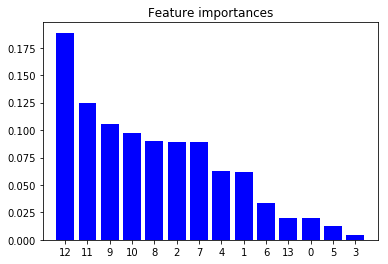

In [17]:
# Bar plot 
best_feature = feature_evaluation.estimator_.feature_importances_
indices = np.argsort(best_feature)[::-1]
# X is the train data used to fit the model 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), best_feature[indices],
       color="b", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# # Box plot

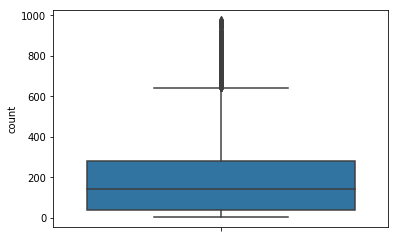

In [18]:
sns.boxplot(y=hours_data['count'])

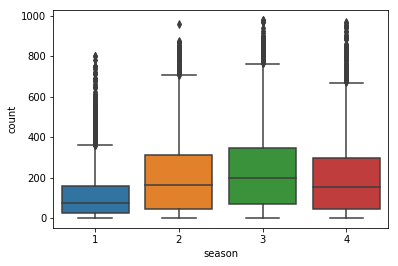

In [19]:
# The bike are used more in season 3 and season 4 and very less in seasin 1
sns.boxplot(x=hours_data['season'],y=hours_data['count'])

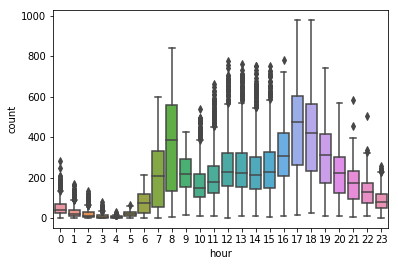

In [20]:
# The hourly box plot shows maximum usage of bike at 8am and 5pm.
sns.boxplot(x=hours_data['hour'],y=hours_data['count'])

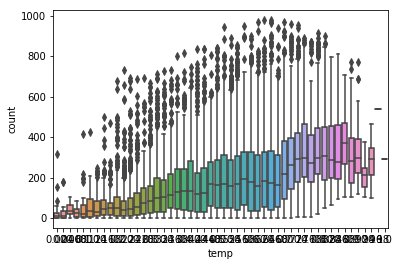

In [21]:
# Higher temperature leads to an increase in number of bike rents and lower temperature reduces also leads to
# increase in outliers in data.
sns.boxplot(x=hours_data['temp'],y=hours_data['count'])

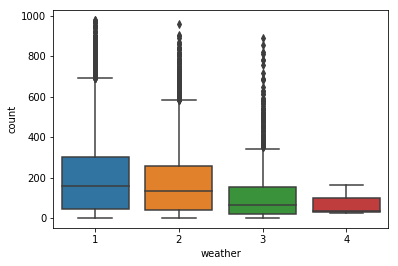

In [22]:
# The box plot shows that the bike is mostly preferred in clear weather and bright day. 
sns.boxplot(x=hours_data['weather'],y=hours_data['count'])

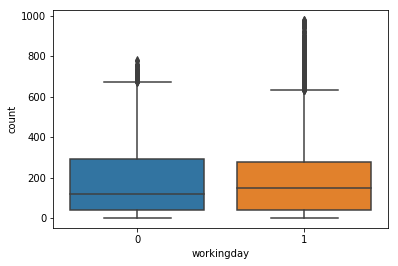

In [23]:
# The bike are rented more during working day than during weekend or holiday.
sns.boxplot(x=hours_data['workingday'],y=hours_data['count'])

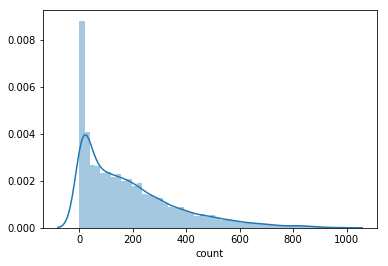

In [24]:
sns.distplot(hours_data['count'])

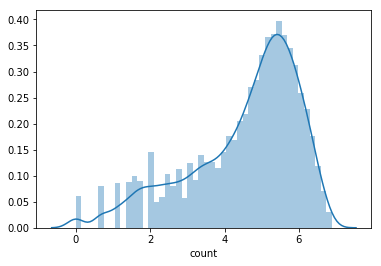

In [25]:
# Normalizing the data using log transform
import math
hours_data['count'] = hours_data['count'].transform(lambda x: math.log(x))
sns.distplot(hours_data['count'])

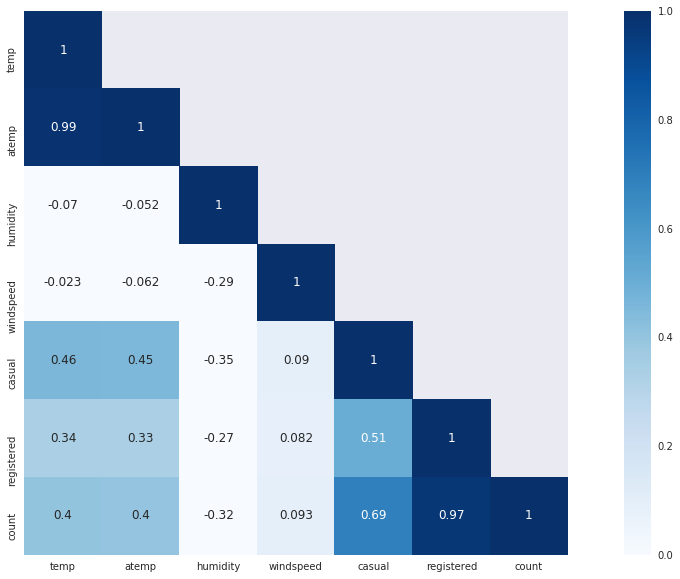

In [7]:
# Correlation Analysis
data = hours_data.corr()
heat = np.array(data)
heat[np.tril_indices_from(heat)]= False
fig, ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(data, mask=heat, vmax=1.0, vmin =0.0, square=True, annot=True, cmap ='Blues')
fig.savefig('Correlation analysis')

Inference: The correlation matrix shows high positive correlation between temp and atemp so we can remove atemp column. The casual and registered data contains information about the count and it could lead to data leakage, hence we can remove both of them. 

In [27]:
hours_data.shape

(17379, 15)

In [11]:
# Removing highly correlated features 
hours_data = hours_data.drop(['atemp','casual','registered'], axis = 1)
hours_data.shape

(17379, 12)

In [12]:
#One hot encoding
data_dummy = hours_data

def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

dummy_data = pd.DataFrame.copy(hours_data)
dummy_columns = ["season", "month", "hour", "holiday", "weekday",'workingday',"weather"]
for dummy_column in dummy_columns:
    dummy_data = generate_dummies(dummy_data, dummy_column)

In [13]:
# Removing the original columns
for dummy_column in dummy_columns:
    del dummy_data[dummy_column]

In [14]:
dummy_data.shape

(17379, 60)

In [15]:
dummy_data.head(5)

,temp,humidity,windspeed,count,datetime,season_1,season_2,season_3,season_4,month_1,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,0.24,0.81,0.0,16,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.80,0.0,40,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.80,0.0,32,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.75,0.0,13,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.75,0.0,1,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0


In [16]:
# Visualizing the dimensions
y = dummy_data['count']
X = dummy_data.drop(['count'],axis=1)
print (X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(17379, 59)
(13903, 59) (3476, 59)


In [17]:
y_test = y_test.ravel()
y_test.shape

(3476,)

## Model

In [18]:
regressor = RandomForestRegressor(n_estimators = 350, max_features = 'auto') 
regressor.fit(X_train,y_train)

# Predicting the values 
y_pred = regressor.predict(X_test)
#y_pred = y_pred.astype(int)

In [19]:
# Printing the mean absolute error
mean_aberr = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: ',mean_aberr)

Mean absolute error:  46.581324046457866


In [20]:
# printing the mean accuracy
accuracy = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv =10)
mean_acc = accuracy.mean()
print('Mean accuracy: ',mean_acc)

Mean accuracy:  0.836643749982733


In [21]:
# Printing the root mean squared log error
RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
print('Root mean squared log error: ', RMSLE)

Root mean squared log error:  0.46189088964144903


In [22]:
# Saving the result in a csv file
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.to_csv('submission.csv')